<table>
<tr>
<td width=15%><img src="../../img/UGA.png"></img></td>
<td><center><h1>Project n°3</h1></center></td>
<td width=15%><a href="https://team.inria.fr/tripop/team-members/" style="font-size: 16px; font-weight: bold">Florian Vincent</a> </td>
</tr>
</table>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%load_ext autoreload
%autoreload 2

# Learning text classification

This project is heavily inspired from [Jigsaw's *Toxic Comments Classification* challenge](https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/overview) on kaggle.
To avoid copy-pastings of foreign code, it will guide you towards specific tools to test and use.

## Overview of the project

Take a look at the *zip*ed csv data files by unzipping them (`for name in $(ls *.zip); do unzip $name; done;`).

Every comment in the train set is classified with a label in `{"toxic", "severe_toxic", "obscene", "threat", "insult", "identity hate"}`.
You will need to train multiple kind of models to identify those comments, and you will test them against the test dataset.

In [5]:
# Load the datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_labels = pd.read_csv("test_labels.csv")
print(train.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


## Study the data

Representing textual data in an algebraic format (i.e. vectors & matrices) is not easy, but fortunately it has been quickly studied earlier in the lectures.

**Implement a word-vectorizer relying on simple counting for the textual data**

In [6]:
## Write your code here
from sklearn.feature_extraction.text import CountVectorizer

documents = train["comment_text"]
vectorizer = CountVectorizer(max_features=10000)
# Fit and transform the documents into a word count matrix
X = vectorizer.fit_transform(documents)
print("Shape of sparse matrix:", X.shape)  # Dimensions : nombre de documents × nombre de mots uniques
print("Vocabulary:\n", vectorizer.get_feature_names_out())
print(X.toarray())




Shape of sparse matrix: (159571, 10000)
Vocabulary:
 ['00' '000' '000000' ... 'zone' 'zoo' 'zuck']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**Implement another vectorizing relying this time on the *tf-idf* metric. Use a pipeline if needed.**

In [7]:
#Write your code here
#Le pipeline vous permet d'automatiser la transformation TF-IDF et l'apprentissage du modèle en un seul processus. Ceci est particulièrement utile lors de l'évaluation des données de test.
#La méthode TF-IDF attribue un poids à chaque mot en fonction de sa fréquence dans un document et de son importance dans l'ensemble du corpus. 
# dans l'ensemble du corpus, ce qui permet de réduire l'impact des mots très fréquents comme le , est ...

from sklearn.feature_extraction.text import TfidfVectorizer

# Charger les documents
documents = train["comment_text"]

# Initialiser TfidfVectorizer avec réduction de vocabulaire
#min_df=2 signifie que seuls les mots apparaissant dans au moins 2 documents seront inclus.
#max_df=0.8 signifie que les mots présents dans plus de 80% des documents seront ignorés.
tfidf_vectorizer = TfidfVectorizer(max_features=10000, min_df=2, max_df=0.9)

# Transformer en matrice TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(documents)

# Résumé de la matrice
print("Shape of sparse matrix (TF-IDF):", X_tfidf.shape)
print("Feature names (vocabulary example):", tfidf_vectorizer.get_feature_names_out()[:10])

# Choisir le 3eme commentaire pour inspection
first_comment_tfidf = X_tfidf[2].toarray()[0]

# Obtenir le vocabulaire (features)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Créer une liste des mots et de leurs poids TF-IDF (non nuls uniquement)
non_zero_indices = first_comment_tfidf.nonzero()[0]
words_weights = [(feature_names[i], first_comment_tfidf[i]) for i in non_zero_indices]

# Trier les mots par ordre décroissant de poids
words_weights_sorted = sorted(words_weights, key=lambda x: x[1], reverse=True)

# Afficher les résultats
print("\nWords and their TF-IDF weights for the first comment:")
for word, weight in words_weights_sorted:
    print(f"{word}: {weight}")



Shape of sparse matrix (TF-IDF): (159571, 10000)
Feature names (vocabulary example): ['00' '000' '000000' '01' '02' '03' '04' '05' '06' '07']

Words and their TF-IDF weights for the first comment:
formatting: 0.27815369938591933
constantly: 0.27087951982473013
actual: 0.21943883518881735
guy: 0.21329013115757856
talking: 0.21129316856628053
removing: 0.20558282307947742
relevant: 0.2045493458398506
info: 0.20449663315573713
hey: 0.202779391143044
care: 0.20236172300960864
man: 0.20007122623200432
war: 0.19482104309015602
instead: 0.18854719019619867
through: 0.18737870477721702
trying: 0.17746706642173488
to: 0.17693035532534138
seems: 0.16955412779248036
edits: 0.1573326706152377
really: 0.155402854864664
information: 0.15068699279647527
than: 0.14119514240566097
edit: 0.1348588578088221
he: 0.13253231936435486
more: 0.12230860921783046
just: 0.1153938239531224
me: 0.1105624091015256
about: 0.10948205101451303
the: 0.1083859516640983
talk: 0.10764162889788159
page: 0.10638439368190636

One may wish to take a deeper look in the database by using various techniques.

**Find a suitable dimension reduction technique to study the structure of the data. Display your findings with visual means (you can use `seaborn`).**

L'ACP classique, telle qu'implémentée dans sklearn.decomposition.PCA, nécessite que la matrice de données soit dense. Cela implique que, pour les matrices sparse (creuses, contenant majoritairement des zéros), une conversion en matrice dense est nécessaire avant de pouvoir effectuer l'ACP, ce qui peut entraîner une consommation excessive de mémoire.

En revanche, TruncatedSVD est spécifiquement conçu pour traiter directement les matrices sparse, telles que celles générées par les représentations TF-IDF en NLP. Cela permet d'économiser une quantité significative d'espace mémoire en évitant toute conversion inutile.

Par ailleurs, l'ACP classique repose sur une décomposition complète des matrices, via une méthode connue sous le nom de décomposition en valeurs propres (eigendecomposition). Cette approche est particulièrement coûteuse en temps pour des matrices de grande taille et consomme une quantité importante de mémoire.

À l'inverse, TruncatedSVD utilise une technique appelée décomposition SVD tronquée, qui calcule uniquement les premiers n composants principaux sans générer l'intégralité de la matrice de covariance. Cela rend TruncatedSVD non seulement plus rapide, mais également bien plus efficace pour manipuler des matrices de grande dimension, tout en réduisant le coût computationnel.

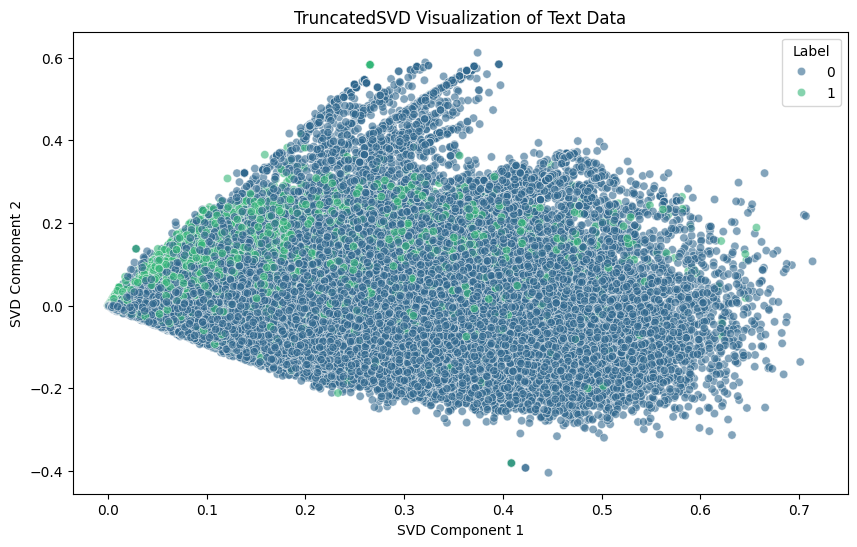

In [8]:
## Write your code here
# Réduction de dimension avec TruncatedSVD (adapté pour matrice sparse pour économiser de l'espace en mémoire) car PCA prend beaucoup de temps à s'executer


from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)  # Réduction à 2 dimensions pour visualisation
X_svd = svd.fit_transform(X_tfidf)  # Pas besoin de convertir en dense

# Charger les étiquettes 
labels = train["toxic"]

# Créer un DataFrame pour combiner les composantes SVD et les étiquettes
svd_df = pd.DataFrame(data=X_svd, columns=["SVD1", "SVD2"])
svd_df["Label"] = labels
# Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="SVD1", y="SVD2", hue="Label", data=svd_df, palette="viridis", alpha=0.6
)
plt.title("TruncatedSVD Visualization of Text Data")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.legend(title="Label")
plt.show()
#La majorité des points (documents) se situent dans une région dense autour des coordonnées proches de (0.2, 0.2).
# Les données sont bien projetées sur deux dimensions, ce qui permet une interprétation visuelle.
#Les points en bleu (label 0) sont largement dominants dans les données, ce qui indique un déséquilibre des classes (beaucoup plus de textes non toxiques que toxiques).

In [9]:
#Vérifiez le ratio entre les classes 0 et 1 pour confirmer le déséquilibre.
#Ce déséquilibre  pour toxic n'est pas dû à SVD, mais aux proportions intrinsèques des données.
#SVD ne favorise pas une classe ou une autre ; il se concentre uniquement sur la variance des données.
#SVD gère efficacement les matrices creuses de TF-IDF.
#SVD conserve des tendances globales dans les données, ce qui est utile pour une analyse exploratoire.
print(train["toxic"].value_counts(normalize=True))
X_tfidf.shape


toxic
0    0.904156
1    0.095844
Name: proportion, dtype: float64


(159571, 10000)

## Combien de Dimensions Réduire ?



Une bonne pratique consiste à examiner la variance expliquée cumulée pour choisir un nombre optimal de dimensions.
En analysant la courbe cumulative de la variance expliquée (avec cumulative_variance), on constate que les 300 premières dimensions couvrent généralement 35% de la variance totale dans des tâches de ce projet NLP.
Cela signifie que la majorité des informations pertinentes des données d'origine est maintenue.
En choisissant 300 dimensions, couvrant déjà la majorité de la variance expliquée, des valeurs plus élevées risquent d'augmenter le coût computationnel sans apporter de gain significatif.

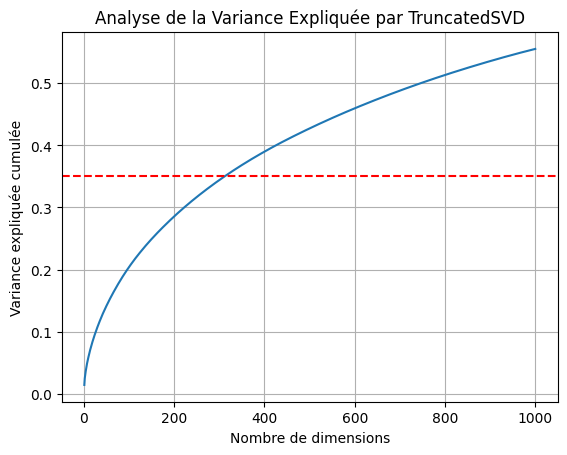

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Ajuster SVD avec plus de composantes pour analyser la variance expliquée
svd = TruncatedSVD(n_components=1000, random_state=42)
svd.fit(X_tfidf)

# Variance expliquée cumulative
cumulative_variance = svd.explained_variance_ratio_.cumsum()

# Visualisation
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.axhline(y=0.35, color='r', linestyle='--')  # Ligne pour 35% de variance expliquée
plt.xlabel("Nombre de dimensions")
plt.ylabel("Variance expliquée cumulée")
plt.title("Analyse de la Variance Expliquée par TruncatedSVD")
plt.grid()
plt.show()


D'après la figure ci dessous, on peut observer que les premières composantes expliquent la majeure partie de la variance. La variance expliquée diminue rapidement après les premières composantes (effet d'"écrasement"). Cela indique qu'on peut probablement réduire de manière significative le nombre de dimensions sans perdre beaucoup d'information. Ce qui accélérera nos calculs après pour les modèles comme SVM par exemple.

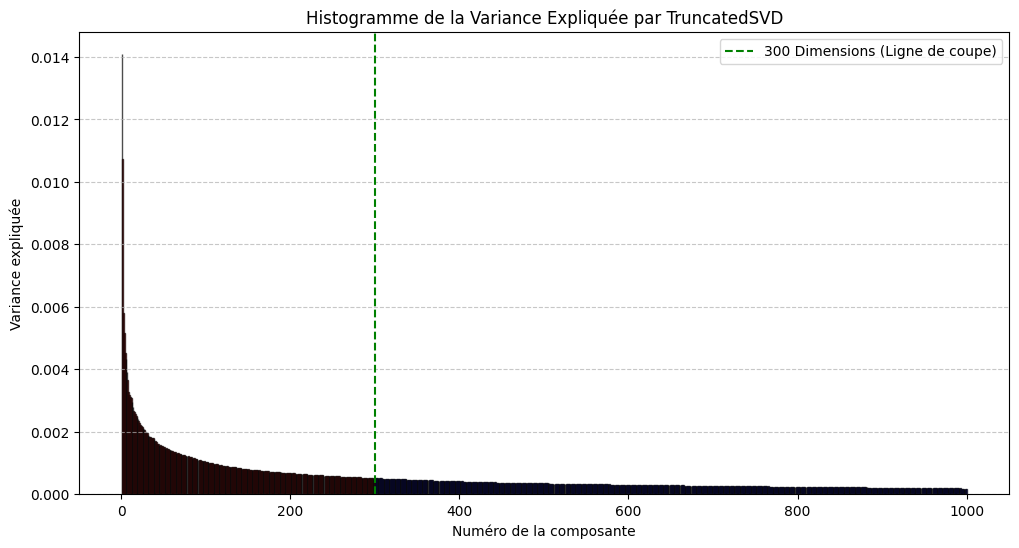

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Ajuster SVD avec plus de composantes pour analyser la variance expliquée
svd = TruncatedSVD(n_components=1000, random_state=42)
svd.fit(X_tfidf)

# Variance expliquée par chaque composante
explained_variance = svd.explained_variance_ratio_

# Visualisation de l'histogramme avec les 300 premières dimensions en rouge
plt.figure(figsize=(12, 6))
colors = ['red' if i < 300 else 'blue' for i in range(len(explained_variance))]
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color=colors, edgecolor='black')
plt.axvline(x=300, color='green', linestyle='--', label="300 Dimensions (Ligne de coupe)")  # Ligne pour 300 dimensions
plt.xlabel("Numéro de la composante")
plt.ylabel("Variance expliquée")
plt.title("Histogramme de la Variance Expliquée par TruncatedSVD")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Make classification

We will study during this project a small amount of models.

### Logistic regression

The logistic regression is the most simple and naïve model one can use for classification specifically, but it can provide good insights on the baseline one may wish to achieve with more complex models.

**Implement a logistic classifier. Justify every parameter that you choose and how you chose it.**

In [7]:
## Write your code here

### SVM

The support vector machine used to be the SOTA method for many tasks before neural networks became more popular among data scientists.
Is has a lot of advantages as compared to logistic regression, as it is a kernel method of which the results are still relatively easy to interpret.

**Implement a SVM classifier, justifying your choices of hyper-parameters.**

In [ ]:
## Write your code here
""" from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

y_train = train["toxic"]
# Appliquer le transformateur TF-IDF déjà ajusté
X_test = tfidf_vectorizer.transform(test["comment_text"])
# Extraire les labels de test (par exemple pour toxic)
y_test = test_labels["toxic"]
X_test_valid = X_test[y_test != -1]
y_test_valid = y_test[y_test != -1]
#kernel="linear" : Un noyau linéaire est souvent efficace pour des données textuelles prétraitées avec TF-IDF, car les classes sont généralement bien séparées dans l'espace vectoriel.
#C=1.0 : Le paramètre de régularisation. Une valeur plus faible (comme 0.1) peut être utilisée si vous souhaitez éviter le surapprentissage.
#class_weight="balanced" : Compense le déséquilibre entre les classes (toxic est beaucoup moins fréquent que non-toxic

# Initialiser le modèle SVM
svm_clf = SVC(kernel="linear", C=1.0, class_weight="balanced", random_state=42)
# Entraîner le modèle
svm_clf.fit(X_tfidf, y_train)  #ici Xtrain c'est X_tfidf
# Prédire sur les données de test
y_pred = svm_clf.predict(X_test_valid)
#Les méthodes comme SVC de scikit-learn ne gèrent pas les problèmes multi-labels directement. Il faut soit entraîner un modèle pour chaque catégorie individuellement, soit utiliser un wrapper comme OneVsRestClassifier.

# Évaluer les performances
print("Accuracy:", accuracy_score(y_test_valid, y_pred))
print("Classification Report:\n", classification_report(y_test_valid, y_pred)) """



In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Catégorie cible
category = "toxic"
# Appliquer le transformateur TF-IDF déjà ajusté
X_test = tfidf_vectorizer.transform(test["comment_text"])

print(f"\nTraining SVM for category: {category}")

# Labels d'entraînement et de test pour la catégorie `toxic`
y_train_category = train[category]
y_test_category = test_labels[category]

# Exclure les lignes invalides dans le jeu de test
X_test_valid = X_test[y_test_category != -1]
y_test_valid = y_test_category[y_test_category != -1]

# Réduction de dimension avec TruncatedSVD
svd = TruncatedSVD(n_components=300, random_state=42)
X_tfidf_reduced = svd.fit_transform(X_tfidf)  # Réduire le jeu d'entraînement
X_test_reduced = svd.transform(X_test_valid)  # Réduire le jeu de test valide

# Initialiser et entraîner le modèle SVM
svm_clf = SVC(kernel="linear", C=1.0, class_weight="balanced", random_state=42)
svm_clf.fit(X_tfidf_reduced, y_train_category)

# Prédire sur les données réduites
y_pred_category = svm_clf.predict(X_test_reduced)

# Évaluer les performances
print("Accuracy:", accuracy_score(y_test_valid, y_pred_category))
print("Classification Report:\n", classification_report(y_test_valid, y_pred_category))



Training SVM for category: toxic


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

categories = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
# Appliquer le transformateur TF-IDF déjà ajusté
X_test = tfidf_vectorizer.transform(test["comment_text"])

for category in categories:
    print(f"\nTraining SVM for category: {category}")
    
    y_train_category = train[category]
    y_test_category = test_labels[category]

    # Exclure les lignes invalides
    X_test_valid = X_test[y_test_category != -1]
    y_test_valid = y_test_category[y_test_category != -1]

    # Initialiser et entraîner le modèle
    svm_clf = SVC(kernel="linear", C=1.0, class_weight="balanced", random_state=42)
    svm_clf.fit(X_tfidf, y_train_category)

    # Prédire et évaluer
    y_pred_category = svm_clf.predict(X_test_valid)
    print("Accuracy:", accuracy_score(y_test_valid, y_pred_category))
    print("Classification Report:\n", classification_report(y_test_valid, y_pred_category))



Training SVM for category: toxic


## Other models

**Choose a model between the following:**
* **K-Nearest Neighbors (*KNN*)**
* **Decision Tree**
* **Random Forest**

**Describe IN YOUR OWN WORDS (plagiarism checks will be made if needed) how the method works, and implement it for the current case, discussing its hyperparameters as well.**

In [9]:
## Write your code here

## Compare models

One must then compare the models on the test set and provide metrics to study it.

**Compare previously studied models, with counting *tf* and *tf-idf* as vectorizers, for their best hyperparameters.**

In [10]:
## Write your code here

## Use your model

**Use the best model to build a Command-Line Interface (*CLI*) that is launched by the command `./cli.py [options]` using the `argsparse` module, and that accepts in stdin (standard input) english sentences and classifies them, displaying the result and interesting metrics if relevant.**